<a href="https://colab.research.google.com/github/schardon/oda-demo-main/blob/main/Cybersecurity_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Time Series using StatsModels



In [1]:
from random import random

In [6]:
time_series = [2 * x + random() for x in range(1, 100)]



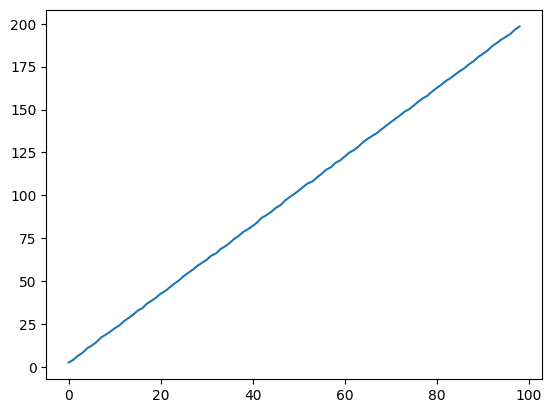

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(0, 1, 2))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[199.76282762]


In [9]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, lags=2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[200.48941948]


In [10]:
model_fit.summary

<bound method AutoRegResults.summary of <statsmodels.tsa.ar_model.AutoRegResults object at 0x7f1882dbb820>>

In [11]:
model_fit.params


array([3.06681524, 0.47733061, 0.52249572])

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                     AutoReg(2)   Log Likelihood                 -25.433
Method:               Conditional MLE   S.D. of innovations              0.315
Date:                Mon, 17 Jun 2024   AIC                             58.867
Time:                        12:22:29   BIC                             69.166
Sample:                             2   HQIC                            63.031
                                   99                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0668      0.183     16.760      0.000       2.708       3.425
y.L1           0.4773      0.086      5.576      0.000       0.310       0.645
y.L2           0.5225      0.086      6.104      0.000       0.355       0.690
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
AR.2           -1.9137           +0.0000j            1.9137            0.5000
-----------------------------------------------------------------------------
"""

#Anomally Detection using Isolation Forest


In [51]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

In [52]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train +  3, X_train]

X_train = pd.DataFrame(X_train, columns=['x', 'y'])

X_train.head()

,x,y
0,3.236493,2.659287
1,3.121220,2.149632
2,3.376571,2.232639
3,3.002564,2.939886
4,2.596509,4.435910


In [53]:
X_test = 0.5 * random_seed.randn(100, 2)
X_test = np.r_[X_test +  3, X_test]

X_test = pd.DataFrame(X_test, columns=['x', 'y'])

X_test.head()

,x,y
0,3.944575,3.866919
1,2.984853,3.142150
2,3.501735,2.168262
3,2.906300,3.233826
4,3.273225,3.261790


In [54]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))

X_outliers = pd.DataFrame(X_outliers, columns=['x', 'y'])

X_outliers.head()

,x,y
0,-1.560737,1.398251
1,-3.476082,-0.236852
2,-4.988811,0.156938
3,-1.826893,-1.609951
4,-1.012323,-4.031357


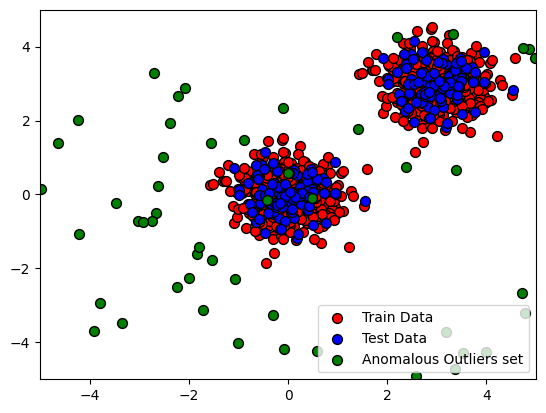

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train['x'], X_train['y'], c='red', s =50, edgecolors='k')
p2 = plt.scatter(X_test['x'], X_test['y'], c='blue', s =50, edgecolors='k')
p3 = plt.scatter(X_outliers['x'], X_outliers['y'], c='green', s =50, edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend([p1, p2, p3], ['Train Data', 'Test Data ', 'Anomalous Outliers set'], loc = "lower right")

plt.show()

In [56]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_outliers_pred = clf.predict(X_outliers)




In [57]:
X_outliers = X_outliers.assign(pred = y_outliers_pred)

X_outliers.head()

,x,y,pred
0,-1.560737,1.398251,-1
1,-3.476082,-0.236852,-1
2,-4.988811,0.156938,-1
3,-1.826893,-1.609951,-1
4,-1.012323,-4.031357,-1


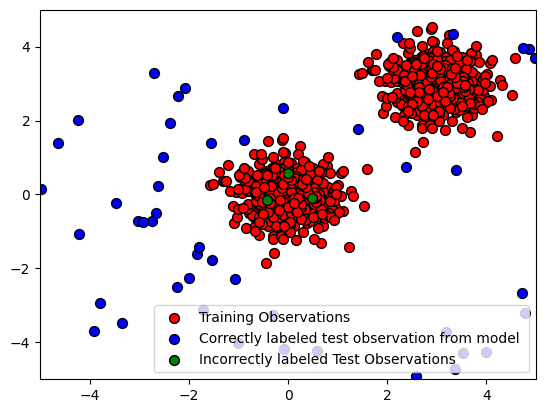

In [59]:
p1 = plt.scatter(X_train['x'], X_train['y'], c='red', s =50, edgecolors='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ['x']], X_outliers.loc[X_outliers.pred == -1, ['y']], c='blue', s =50, edgecolors='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ['x']], X_outliers.loc[X_outliers.pred == 1, ['y']], c='green', s =50, edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend([p1, p2, p3], ['Training Observations', 'Correctly labeled test observation from model ', 'Incorrectly labeled Test Observations'], loc = "lower right")

plt.show()

#Standardizing your data before processing


In [34]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cybersecurity-june24/main/file_pe_headers.csv", sep=',')
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [35]:
X = data.drop(["Name", "Malware"], axis=1)
X.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [36]:
X = data.drop(["Name", "Malware"], axis=1).to_numpy()

X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [37]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler()

X_standardized = X_standardized.fit_transform(X)

X_standardized

array([[ 0.        , -0.03506542, -0.04751096, ..., -0.07054894,
        -0.0198525 , -0.04066791],
       [ 0.        , -0.03506542, -0.04751096, ..., -0.03849221,
        -0.02110877, -0.02469983],
       [ 0.        , -0.03506542, -0.04751096, ..., -0.07599254,
        -0.02110877, -0.04066791],
       ...,
       [ 0.        , -0.18093613, -0.04958686, ..., -0.07296832,
        -0.02110877, -0.04066791],
       [ 0.        , -0.03506542, -0.04751096, ..., -0.06691988,
        -0.02110877, -0.04066791],
       [ 0.        , -0.03506542, -0.04751096, ...,  0.00021781,
        -0.02110877, -0.04066791]])

In [38]:
data.shape

(19611, 79)

In [39]:
data.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [40]:
data.drop(["Name", "Malware"], axis=1, inplace = True)
data.shape

(19611, 77)

# RouteCause of Data Error


In [61]:
! pip install markovify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.7 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18608 sha256=14f78a21189d9126ae6304a321ff79b95dd9bf4b9e205e653d04bdcfe15bddc4
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [81]:
import markovify
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cybersecurity-june24/main/airport_reviews.csv")


In [82]:
df.head()


,content
0,The airport is certainly tiny! Arriving there ...
1,Small airports are generally intimate friendly...
2,Waited an hour in a corridor for baggage but o...
3,The previous comment is so off the mark it mus...
4,The airport resulbles a shack. A very bad cafe...


In [83]:
df.head(3)

,content
0,The airport is certainly tiny! Arriving there ...
1,Small airports are generally intimate friendly...
2,Waited an hour in a corridor for baggage but o...


In [84]:
from itertools import chain

N = 100
review_subset = df['content'][0:100]

text = "".join(chain.from_iterable(review_subset))

text


'The airport is certainly tiny! Arriving there was good off the plane quick straight onto a connecting bus to Brussels. Staff at the information stand were helpful & spoke English. The outbound journey wasn\'t as pleasant security was over zealous (having to remove belt watch etc) and very unfriendly. Didn\'t bother using the \'canteen\' in the cupboard (departure lounge 1) and there was a big crush fighting fellow passengers to get on the aircraft. The toilets in the lounge were filthy stinking & graffitid. Having said that for a flight that cost about the same as a pizza it\'s worth putting up with and I\'d use it again.Small airports are generally intimate friendly and welcoming. Not so with Charleroi. It is dirty seriously overcrowded at peak times and facilities are terrible. Ryanair does a good job of running a base on these facilities mind. Links to Brussels are good but that\'s really thanks to Ryanair themselves. Food is terrible and waiting areas are not so conducive to exten

In [85]:
markov_chain_model = markovify.Text(text)

In [86]:
for i in range(10):
  print(markov_chain_model.make_sentence())

Trains to downtown Brussels run every 20min and are dirty the waiting Sabena plane.Having travelled around the airport would be surely bored.
EUR is not accepted anywhere and the other for non Euro people.
I was then asked to pay for the wireless internet.
Serve is the wrong direction by an airport staff is friendly and welcoming.
Passport control was slow: in total it took 40 minutes sitting at my gate to avoid missing the flight as the airline thought 30 mins minimum.DEL-BRU-GVA.
B gates are less bright but the transfer point.
However smoking areas not to mention the toilets.
At length someone else showed up and down and miles of moving walkways with few minutes to get through this airport and have had in years.
I guess the airlines are used to like travelling through Brussels Airport return.
Landed at T-B onward connection to Brussels we could have walked quicker to town centre.


In [87]:
for i in range(5):
  print(markov_chain_model.make_sentence())


Signals in the airport are over.
The only really bother: you may have to go that far?
Confusing in the end but otherwise no complaints.
If you can have here a good business lounge.
If you're lucky you will be printed on the 25th of August at 21.35 was smooth.


In [88]:
for i in range(10):
  print(markov_chain_model.make_short_sentence(140))


This did not know what to do but no more.
Quite a long wait at passport control since the terminal not requiring any documents.
Especially in the departure hall and especially the rip-off taxi-drivers who wait for my trip to Bangkok via Istanbul.
Arriving in the last thing I want when rushing to meetings is a small not very busy and clean though dated.
This did not receive luggage to be prudent.Brussels Airport is convenient and most of the worst airports in Europe.
Overall nothing is horrible but it's nothing too exciting.
I think the longest for baggage connecting with public transport system.
EUR is not the best airport I know I believe and the waiting is OK.
With improved intercontinental connections and we were at the head of the most remote departure gate!
Transfers between Bucharest City and the check-in zone but once you do the check-in.
